In [29]:
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse_drug = pd.read_csv(mouse_drug_data_to_load)
df_clinical_trial = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
df_merge = pd.merge(df_clinical_trial,df_mouse_drug, how= "inner", on ="Mouse ID")
df_combined = df_merge[['Drug', 'Timepoint', 'Tumor Volume (mm3)','Metastatic Sites']]
# Display the data table for preview
df_combined.head()



,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0
1,Capomulin,5,45.651331,0
2,Capomulin,10,43.270852,0
3,Capomulin,15,43.784893,0
4,Capomulin,20,42.731552,0


## Tumor Response to Treatment

In [30]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df_data_grp = df_combined.groupby(by=['Drug','Timepoint'])
# Convert to DataFrame
df_volume = pd.DataFrame(df_data_grp["Tumor Volume (mm3)"].mean()).reset_index()
# Preview DataFrame
df_volume.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [31]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
df_sem = pd.DataFrame(df_data_grp["Tumor Volume (mm3)"].sem()).reset_index()

# Preview DataFrame
df_sem.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [32]:
# Minor Data Munging to Re-Format the Data Frames
df_volume_reform = df_volume.pivot(index = "Timepoint", columns="Drug",values='Tumor Volume (mm3)')
df_sem_reform = df_sem.pivot(index = "Timepoint", columns="Drug",values='Tumor Volume (mm3)')


# Preview that Reformatting worked
df_volume_reform = df_volume_reform.reset_index()
df_sem_reform = df_sem_reform.reset_index()
df_volume_reform.head()



Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


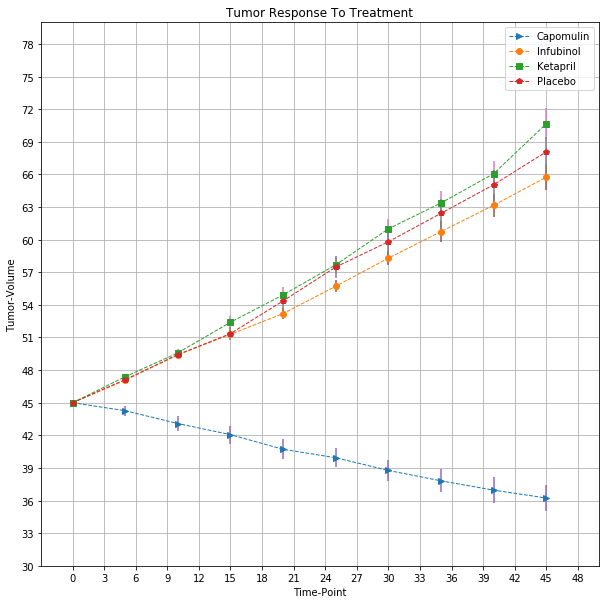

In [45]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,10) )
plt.xlabel('Time-Point')
plt.ylabel('Tumor-Volume')
plt.title("Tumor Response To Treatment")

Capomulin, = plt.plot( df_volume_reform["Timepoint"],df_volume_reform['Capomulin'],'--', marker = '>' ,label= 'Capomulin', linewidth = 1)
Infubinol, = plt.plot( df_volume_reform["Timepoint"],df_volume_reform['Infubinol'],'--', marker = 'o',label= 'Infubinol', linewidth = 1)
Ketapril, = plt.plot( df_volume_reform["Timepoint"],df_volume_reform['Ketapril'],'--', marker='s', label= 'Ketapril', linewidth = 1)
Placebo, = plt.plot( df_volume_reform["Timepoint"],df_volume_reform['Placebo'],'--', marker='p', label= 'Placebo', linewidth = 1)

plt.errorbar(df_volume_reform["Timepoint"],df_volume_reform['Capomulin'], yerr= df_sem_reform['Capomulin'], fmt='none')
plt.errorbar(df_volume_reform["Timepoint"],df_volume_reform['Infubinol'], yerr= df_sem_reform['Infubinol'],fmt='none')
plt.errorbar(df_volume_reform["Timepoint"],df_volume_reform['Ketapril'], yerr= df_sem_reform['Ketapril'],fmt='none')
plt.errorbar(df_volume_reform["Timepoint"],df_volume_reform['Placebo'], yerr= df_sem_reform['Placebo'],fmt='none')

plt.xticks(np.arange(0,50,3))
plt.yticks(np.arange(30,80,3))
plt.grid(True)
plt.xlim(-3,50)
plt.ylim(30,80)

plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc ="best")

# Show the Figure
plt.show()






## Metastatic Response to Treatment

In [17]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Convert to DataFrame
# Preview DataFrame
df_met = pd.DataFrame(df_data_grp["Metastatic Sites"].mean()).reset_index()
# Preview DataFrame
df_met.head()




,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [18]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
df_met_sem = pd.DataFrame(df_data_grp["Metastatic Sites"].sem()).reset_index()
# Preview DataFrame
df_met_sem.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [21]:
# Minor Data Munging to Re-Format the Data Frames
df_met_reform= df_met.pivot(index="Timepoint",columns="Drug", values ='Metastatic Sites').reset_index()
df_met_sem_reform= df_met_sem.pivot(index="Timepoint",columns="Drug", values ='Metastatic Sites').reset_index()
# Preview that Reformatting worked
df_met_reform.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


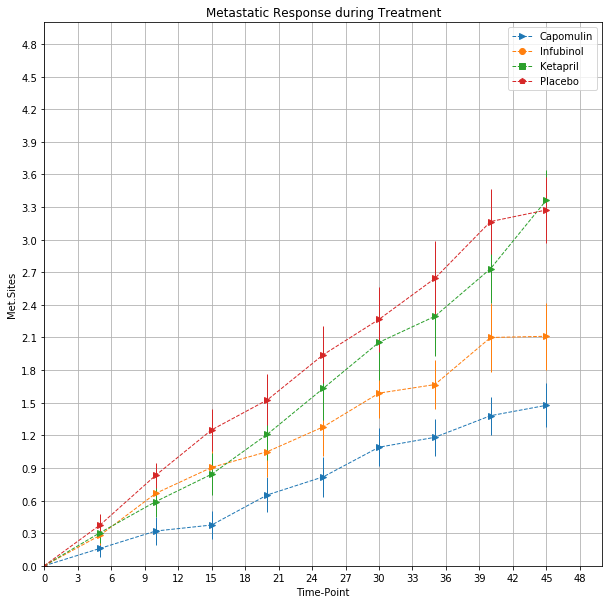

In [60]:
# Generate the Plot (with Error Bars)
fig,ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('Time-Point')
ax.set_ylabel('Met.Sites')
ax.set_title("Metastatic Response during Treatment")

ax.errorbar( df_met_reform["Timepoint"],df_met_reform['Capomulin'],fmt='-->',yerr=df_met_sem_reform['Capomulin'],label= 'Capomulin', linewidth = 1 )
ax.errorbar( df_met_reform["Timepoint"],df_met_reform['Infubinol'],fmt='-->',yerr=df_met_sem_reform['Infubinol'],label= 'Infubinol', linewidth = 1 )
ax.errorbar( df_met_reform["Timepoint"],df_met_reform['Ketapril'],fmt='-->',yerr=df_met_sem_reform['Ketapril'],label= 'Ketapril', linewidth = 1 )
ax.errorbar( df_met_reform["Timepoint"],df_met_reform['Placebo'],fmt='-->',yerr=df_met_sem_reform['Placebo'],label= 'Placebo', linewidth = 1 )


ax.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc ="best")
ax.grid(True)
plt.xticks(np.arange(0,50,3))
plt.yticks(np.arange(0,5,0.3))
plt.xlim(0,50)
plt.ylim(0,5)
plt.show()


# Save the Figure

# Show the Figure


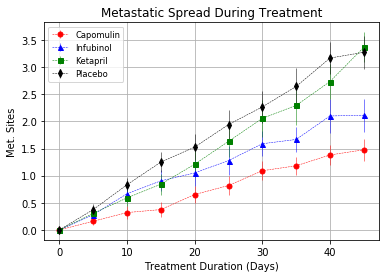

## Survival Rates

In [107]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df_survival_grp = df_merge.groupby(by=['Drug','Timepoint'])
df_sur = pd.DataFrame(df_survival_grp["Mouse ID"].count()).reset_index()
df_sur.rename(columns={'Mouse ID' : "Mouse Count"}, inplace = True)
#df_sur.columns
# Preview DataFrame
df_sur.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [109]:
# Minor Data Munging to Re-Format the Data Frames
df_sur_reform = df_sur.pivot(index="Timepoint",columns= "Drug", values="Mouse Count")
df_sur_reform.head()
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


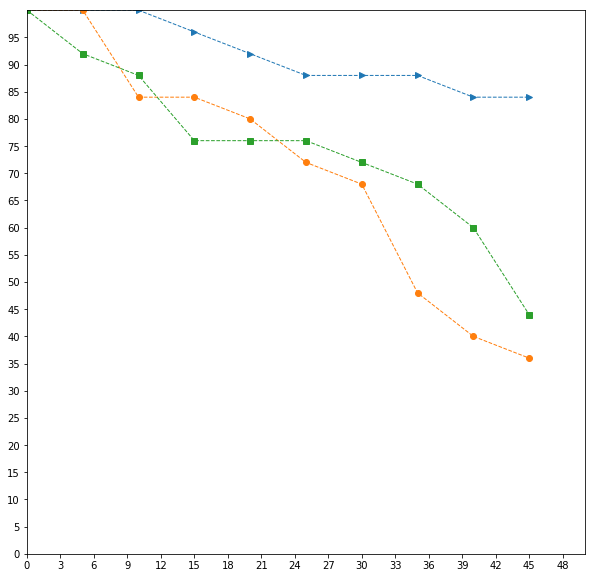

In [118]:
# Generate the Plot (Accounting for percentages)
df_sur_max = df_sur.loc[df_sur["Timepoint"]==0].reset_index()
df_sur_merge = pd.merge(df_sur[["Drug","Timepoint","Mouse Count"]], df_sur_max[["Drug","Mouse Count"]] , on= "Drug", how= 'inner')
df_sur_merge["Percent"] = round((df_sur_merge["Mouse Count_x"]/df_sur_merge["Mouse Count_y"])*100)
df_survival_percent = df_sur_merge[["Drug","Timepoint","Percent"]]
df_survival_percent = df_survival_percent.pivot(index="Timepoint",columns="Drug",values="Percent").reset_index()
df_survival_percent = df_survival_percent[['Timepoint','Capomulin','Infubinol','Ketapril','Placebo']]
df_survival_percent.head()
# Save the Figure


# Generate the Plot (with Error Bars)
fig,ax_sur = plt.subplots(figsize=(10,10))
ax.set_xlabel('Time-Point')
ax.set_ylabel('Survival Percent')
ax.set_title("Mouse Survival Percentage during the Treatment")

ax_sur.plot( df_survival_percent["Timepoint"],df_survival_percent['Capomulin'],'--',marker='>',label= 'Capomulin', linewidth = 1 )
ax_sur.plot( df_survival_percent["Timepoint"],df_survival_percent['Infubinol'],'--',marker='o',label= 'Infubinol', linewidth = 1 )
ax_sur.plot( df_survival_percent["Timepoint"],df_survival_percent['Ketapril'],'--', marker ='s',label= 'Ketapril', linewidth = 1 )
# ax_sur.plot( df_met_reform["Timepoint"],df_met_reform['Placebo'],fmt='-->',label= 'Placebo', linewidth = 1 )


ax.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc ="best")
ax.grid(True)
plt.xticks(np.arange(0,50,3))
plt.yticks(np.arange(0,100,5))
plt.xlim(0,50)
plt.ylim(0,100)
plt.show()



# Show the Figure
#plt.show()

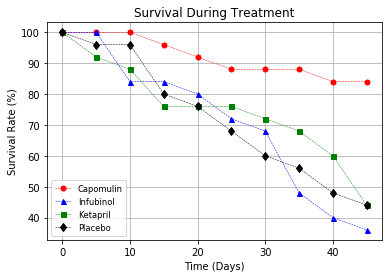

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

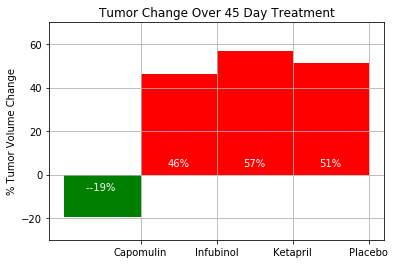